In [18]:
import numpy as np
import math

lamda = 1
nxstep = 64
xfinal = 1.0
xini = 0.0
xstep = (xfinal - xini) / nxstep
nystep = 64
yfinal = 1.0
yini = 0.0
ystep = (yfinal - yini) / nystep
ntstep = 10000
tfinal = 2/np.sqrt(5)
tini = 0.0
tstep = (tfinal - tini) / ntstep

T = np.zeros((nxstep+1,nystep+1,ntstep+1))

for i in range(1,nxstep):
     for j in range(1,nystep):
          T[i][j][0] = np.sin(np.pi*(xini+i*xstep))*np.sin(2*np.pi*(yini+j*ystep))
          T[i][j][1] = T[i][j][0]

for t in range(2,ntstep+1):
    for i in range(1,nxstep):
        for j in range(1,nystep):
            T[i][j][t] = 2*T[i][j][t-1]-T[i][j][t-2]+(tstep**2)*lamda*((T[i-1][j][t-1]-2*T[i][j][t-1]+T[i+1][j][t-1])/xstep**2+(T[i][j-1][t-1]-2*T[i][j][t-1]+T[i][j+1][t-1])/ystep**2)

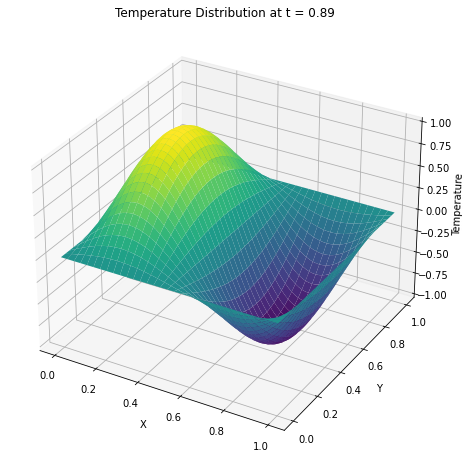

In [19]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Create a figure and axis
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(xini, xfinal, nxstep+1)
y = np.linspace(yini, yfinal, nystep+1)
X, Y = np.meshgrid(x, y)
ax.set_zlim3d(-1,1)

def update(t):
    ax.clear()
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Temperature')
    ax.set_title(f'Temperature Distribution at t = {t * tstep:.2f}')
    ax.set_zlim3d(-1,1)
    surf = ax.plot_surface(X, Y, T[:, :, t], cmap='viridis', edgecolor='none')
    return surf,

# Create the animation
ani = FuncAnimation(fig, update, frames=range(0, ntstep+1, 500), interval=50, blit=True)

# Save the animation as a GIF
ani.save('4animation.gif', writer='pillow')

plt.show()


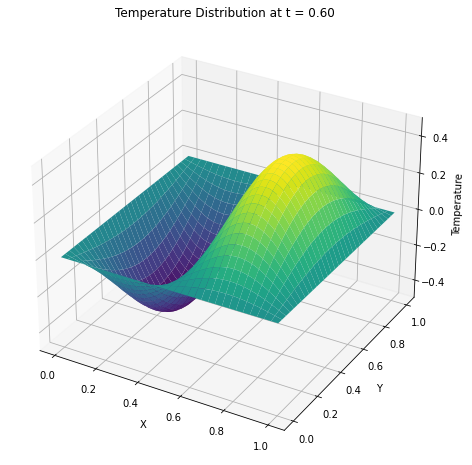

In [15]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

t = 6000  # Choose the time step you want to visualize

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(xini, xfinal, nxstep+1)
y = np.linspace(yini, yfinal, nystep+1)
X, Y = np.meshgrid(x, y)
Z = T[:,:,t]

surf = ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Temperature')
ax.set_title(f'Temperature Distribution at t = {t * tstep:.2f}')

plt.show()
